## Spark

### Spark特点

Spark具有如下几个主要特点：

* 运行速度快：Spark使用先进的DAG（Directed Acyclic Graph，有向无环图）执行引擎，以支持循环数据流与内存计算，基于内存的执行速度可比Hadoop MapReduce快上百倍，基于磁盘的执行速度也能快十倍；

* 容易使用：Spark支持使用Scala、Java、Python和R语言进行编程，简洁的API设计有助于用户轻松构建并行程序，并且可以通过Spark Shell进行交互式编程；

* 通用性：Spark提供了完整而强大的技术栈，包括SQL查询、流式计算、机器学习和图算法组件，这些组件可以无缝整合在同一个应用中，足以应对复杂的计算；

* 运行模式多样：Spark可运行于独立的集群模式中，或者运行于Hadoop中，也可运行于Amazon EC2等云环境中，并且可以访问HDFS、Cassandra、HBase、Hive等多种数据源。

Spark最大的特点就是将计算数据、中间结果都存储在内存中，大大减少了IO开销

### 基本概念
*  RDD：是弹性分布式数据集（Resilient Distributed Dataset）的简称，是分布式内存的一个抽象概念，提供了一种高度受限的共享内存模型；
*  DAG：是Directed Acyclic Graph（有向无环图）的简称，反映RDD之间的依赖关系；
*  Executor：是运行在工作节点（Worker Node）上的一个进程，负责运行任务，并为应用程序存储数据；
*  应用：用户编写的Spark应用程序；
*  任务：运行在Executor上的工作单元；
*  作业：一个作业包含多个RDD及作用于相应RDD上的各种操作；
*  阶段：是作业的基本调度单位，一个作业会分为多组任务，每组任务被称为“阶段”，或者也被称为“任务集”。

### 架构设计

在Spark中，一个应用（Application）由一个任务控制节点（Driver）和若干个作业（Job）构成，一个作业由多个阶段（Stage）构成，一个阶段由多个任务（Task）组成。当执行一个应用时，任务控制节点会向集群管理器（Cluster Manager）申请资源，启动Executor，并向Executor发送应用程序代码和文件，然后在Executor上执行任务，运行结束后，执行结果会返回给任务控制节点，或者写到HDFS或者其他数据库中。
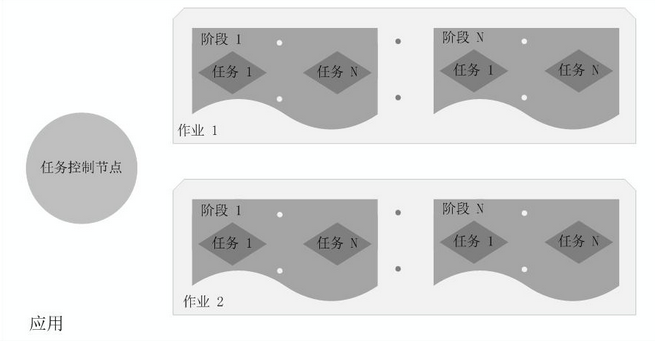

### 运行流程

（1）当一个Spark应用被提交时，首先需要为这个应用构建起基本的运行环境，即由任务控制节点（Driver）创建一个SparkContext，由SparkContext负责和资源管理器（Cluster Manager）的通信以及进行资源的申请、任务的分配和监控等。SparkContext会向资源管理器注册并申请运行Executor的资源；

（2）资源管理器为Executor分配资源，并启动Executor进程，Executor运行情况将随着“心跳”发送到资源管理器上；

（3）SparkContext根据RDD的依赖关系构建DAG图，DAG图提交给DAG调度器（DAGScheduler）进行解析，将DAG图分解成多个“阶段”（每个阶段都是一个任务集），并且计算出各个阶段之间的依赖关系，然后把一个个“任务集”提交给底层的任务调度器（TaskScheduler）进行处理；Executor向SparkContext申请任务，任务调度器将任务分发给Executor运行，同时，SparkContext将应用程序代码发放给Executor；

（4）任务在Executor上运行，把执行结果反馈给任务调度器，然后反馈给DAG调度器，运行完毕后写入数据并释放所有资源。
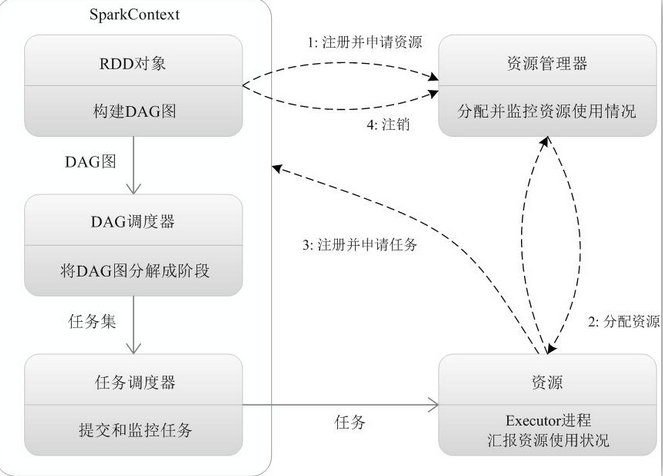